In [1]:
# 한글 지원이 안돼서 나눔폰트 설치
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq    # 나눔폰트
import matplotlib.font_manager as fm # 아래 위치에 저장됨(나눔고딕으로 저장함)
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe) # fontManager에 ttf 파일 저장
# runtime Configuration
# 글자는 폰트 사이즈별로 폰트 이미지가 있어야함 -> font.family (이걸로 지정)


# plt rc 직접 지정
plt.rcParams.update({'font.size': 18, 'font.family':'NanumBarunGothic'})
plt.rc('figure', figsize =(10,10))
font_option = {'family':'NanumBarunGothic',
               'weight':'bold',
               'size':20}
plt.rc('font', **font_option)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

### brute-force: 모든 데이터와 비교
# KDTree

In [2]:
# KDTree 단독 사용
from sklearn.neighbors import KDTree
import numpy as np

data = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
kdtree = KDTree(data, leaf_size = 30)  # 트리 구성
query_point = np.array([[9, 2]])  # 여기랑 가장 가까운 값이 얼마인가

# 가장 가까운 2개를 검색한다.
distances, indices = kdtree.query(query_point, k=2)
print("Query Point:", query_point)

for i, idx in enumerate(indices[0]):
  print(f"Neighbor {i+1}: {data[idx]}, Distance: {distances[0][i]}")

Query Point: [[9 2]]
Neighbor 1: [8 1], Distance: 1.4142135623730951
Neighbor 2: [7 2], Distance: 2.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9],
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])

# NearestNeighbors
 - 이상탐지

      - 거리 값이 클 때
      
      - 주변에 밀도가 낮을 때(연결된 데이터가 작을 때)
 - 이미지 검색
 - 군집 중심 찾기할 때 사용

(1, 5)
1 ==> [5.1 2.2]
2 ==> [3.8 3.7]
3 ==> [3.4 1.9]
4 ==> [2.9 2.5]
5 ==> [5.7 3.5]


array([[0.94339811, 1.11803399, 1.20415946, 1.41421356, 1.61245155]])

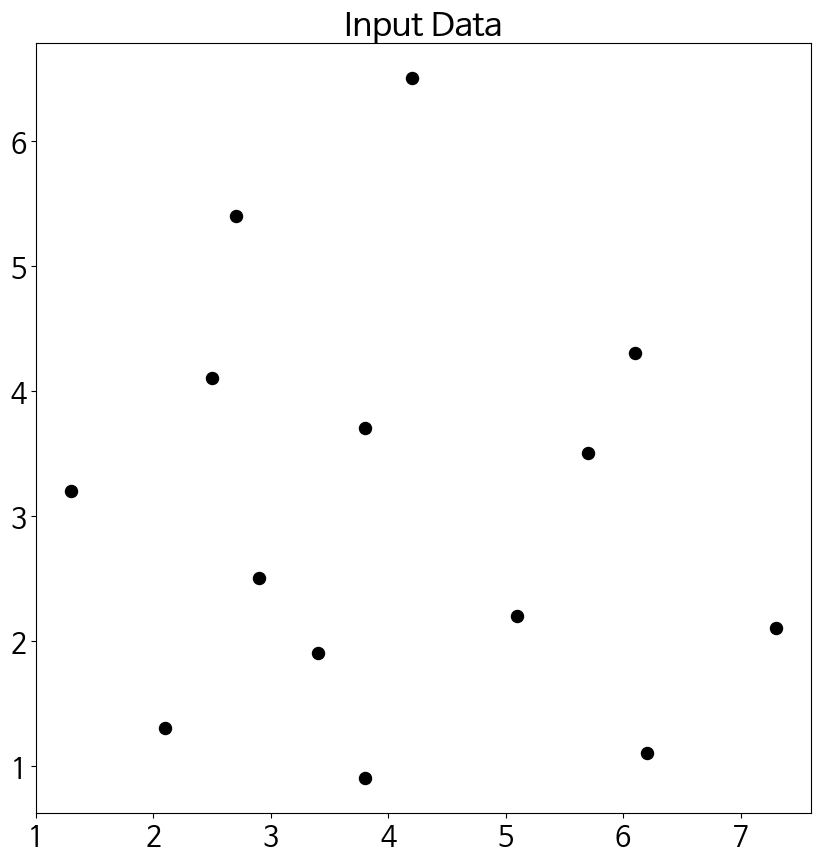

In [5]:
# NearestNeighbors: 알고리즘 ball_tree로 구성하고, 내부적으로 KNN 구성
# KNN: 인스턴스 기반 모델 (모델을 실시간 학습 -> 거리 값 저장해놓을 수 없음)
# 저장 -> 트리로 구성한 내용을 저장 (가중치가 아니기 때문에, MODEL 저장 불가함.)

k = 5
test_datapoint = [4.3, 2.7]
plt.figure()
plt.title('Input Data')
plt.scatter(X[:, 0], X[:, 1], marker = 'o', s = 75, color = 'black')

# 거리 값을 기준으로 검색  # 데이터를 ball_tree 형태로 구성하겠다는 의미
knn_model = NearestNeighbors(n_neighbors= k, algorithm = 'ball_tree').fit(X)

distances, indices = knn_model.kneighbors([test_datapoint])
print(indices.shape)

for rank, index in enumerate(indices[0][:k], start = 1):
  print(str(rank) + " ==>", X[index])

distances

# 시각화

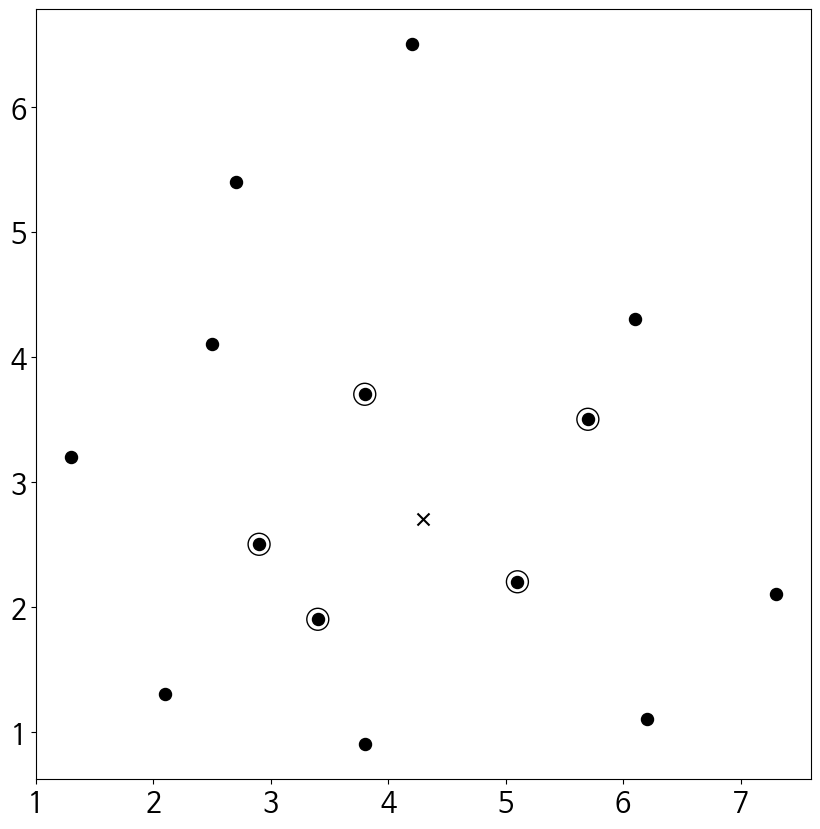

In [6]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker = 'o', s = 75, color = 'k')
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:, 1],
            marker = 'o', s = 250, color = 'k', facecolors = 'none')

plt.scatter(test_datapoint[0], test_datapoint[1],
            marker = 'x', s = 75, color = 'k')

plt.show()

# 분류기

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

# metricstr or callable, default = "minkowski"
# 차의 제곱 -> 유클리디안 거리
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 42)

knn_clf = KNeighborsClassifier(n_neighbors= 5, weights = 'uniform')  # 가중치: uniform, distance
knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)
print(f"예측된 클래스: {y_pred}")
print(f"모델 정확도: {knn_clf.score(X_test, y_test): .4f}")

예측된 클래스: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
모델 정확도:  1.0000


# 회귀
 - 최근접 노드의 평균값으로 예측

In [9]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

knn_reg = KNeighborsRegressor(n_neighbors = 3, weights = 'distance')
knn_reg.fit(X, y)

X_test = np.array([[5.5], [6.5], [7.5]])
y_pred = knn_reg.predict(X_test)
print(f"예측된 값: {y_pred}")

예측된 값: [18.57142857 20.57142857 22.57142857]


### 문제 1

In [18]:
# # 위의 모델을 저장하고, 로드해서 X_test를 예측해보시오.
# import joblib

# joblib.dump(knn_reg, 'knn_reg.pkl')
# loaded_model = joblib.load('knn_reg.pkl')

# y_pred = loaded_model.predict(X_test)
# print(f"예측된 값: {y_pred}")
# print(f"모델 정확도: {loaded_model.score(X_test, y_test): .4f}")

In [19]:
# 위의 모델을 저장하고, 로드해서 X_test를 예측해보시오.
import joblib
import numpy as np

joblib.dump(knn_reg, 'knn_reg.pkl')
loaded_model = joblib.load('knn_reg.pkl')

X_test = np.array([[5.5], [6.5], [7.5]])  # Your X_test for regression
y_pred = loaded_model.predict(X_test)
print(f"예측된 값: {y_pred}")

y_test_reg = np.array([19, 21, 23])  # Define y_test for regression
print(f"모델 정확도: {loaded_model.score(X_test, y_test_reg): .4f}")

예측된 값: [18.57142857 20.57142857 22.57142857]
모델 정확도:  0.9311


# 이상탐지모델 지원하는 방법 LocalOutlierFactor

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


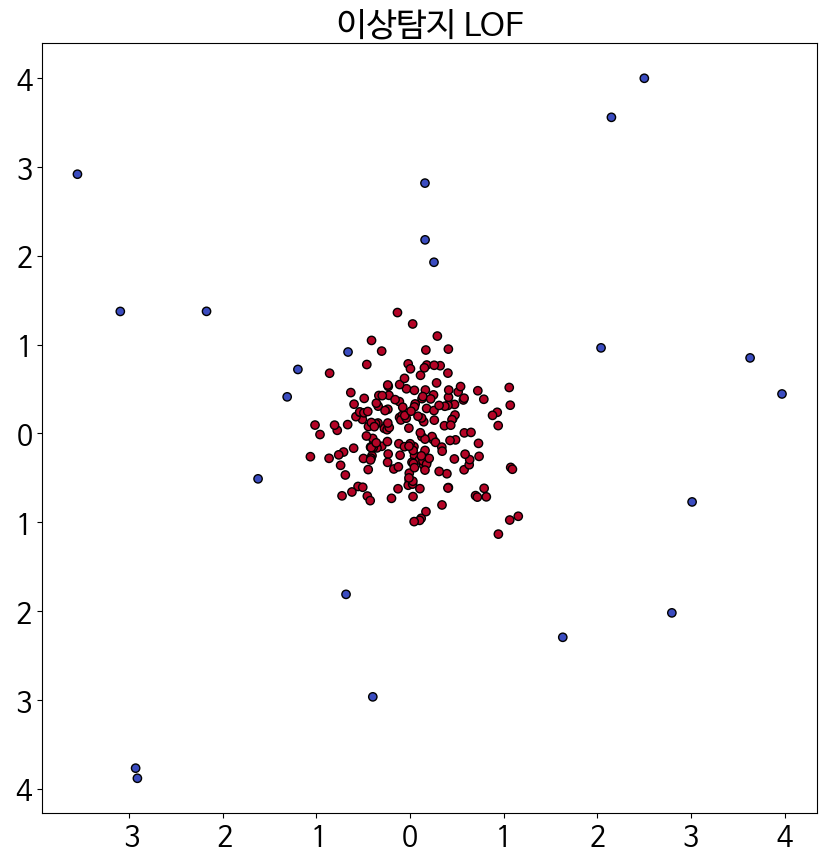

In [17]:
# 전처리: 이상탐지 boxplot 확인 ( iqr * 1.5 => 단일 변수 )
# 다변량 이상 탐지, KNN 기반의 밀도 기반 이상치 처리

from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)
X = np.random.randn(200, 2) * 0.5  # 변수가 2개라는 의미
outliers = np.random.uniform(low = -4, high = 4, size = (20, 2))
# 220x2 (행으로 200개와 20개 묶고, 변수가 2개임. 2개로 거리 값 재는 것.)

X = np.vstack([X, outliers])  # 데이터를 결합할 때, concatenate(pandas일 때 사용)

# contamination 전체에서 몇 %를 이상치로 볼 것인가.
lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)  # 10% 이상치로 보겠다는 의미
y_pred = lof.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = "coolwarm", edgecolors="k")
plt.title("이상탐지 LOF")
plt.show()

# KNN 얼굴 분류

(87, 65)
이미지 한 장의 사이즈 (87, 65)


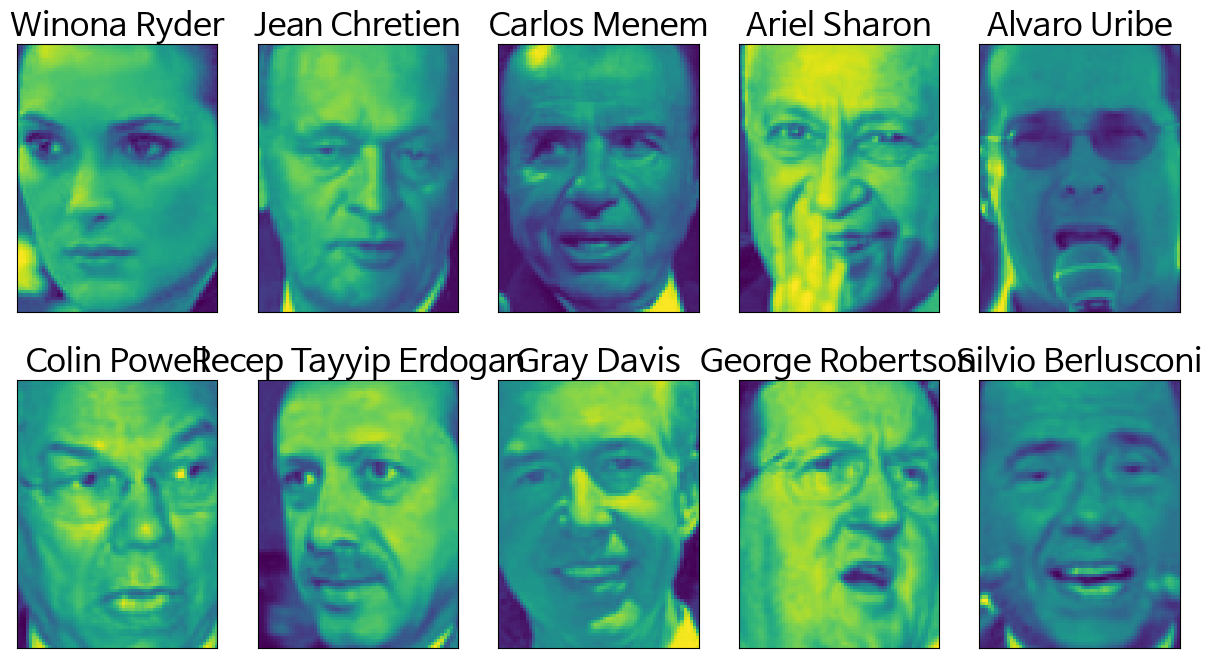

In [22]:
# bunch: data, target, feature_names가 들어옴
# image bunch: images가 들어옴, target, target_names
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape
print(image_shape)
print("이미지 한 장의 사이즈", image_shape)  # (87, 65)

# 10장의 도화지를 만들고 (axes)
fig, axes = plt.subplots(2, 5, figsize = (15, 8),
                         subplot_kw = {'xticks': (), 'yticks': ()})

# target, images를 한 장씩 짝 지음. and 조합해서 target을 target_name에서 찾고 있음.
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [24]:
print(people.target[0:10], people.target_names[people.target[0:10]])
print("\n이미지 차수: {}".format(people.images.shape))  # 이미지 장수(3023), 행, 열
print("클래스 차수: {}".format(len(people.target_names)))  # 62명에 대한 데이터가 있다.

[61 25  9  5  1 10 48 17 13 54] ['Winona Ryder' 'Jean Chretien' 'Carlos Menem' 'Ariel Sharon'
 'Alvaro Uribe' 'Colin Powell' 'Recep Tayyip Erdogan' 'Gray Davis'
 'George Robertson' 'Silvio Berlusconi']

이미지 차수: (3023, 87, 65)
클래스 차수: 62


In [25]:
# 번호순으로 몇 개의 데이터 반복
counts = np.bincount(people.target)  # bincount가 인덱스와 개수를 0 ~ 61번까지
for i, (count, name) in enumerate(zip(counts, people.target_names)): # 인덱스, 개수를 이름과 맵핑
  print("{0:25} {1:3}".format(name, count), end = ' ') # end = ' ': 옆으로 가라~
  if (i+1) % 3 == 0: # 3명 치고 엔터~ 하라는 의미
    print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [26]:
np.where(people.target == target)[0][:50]

array([   9,  138,  225,  402,  421,  526,  601,  656,  667,  833,  893,
        957, 1007, 1022, 1302, 1304, 1376, 1437, 1515, 1764, 1772, 1779,
       1861, 1866, 1869, 1995, 1997, 2104, 2196, 2843, 2844, 2892, 2894])

In [27]:
# np.bool = np.bool_  # 중간에 데이터 타입의 변동
# # 0000000000000000
# mask = np.zeros(people.target.shape, dtype = np.bool)
# for target in np.unique(people.target):  # 이름의 종류
#   mask[np.where(people.target == target)[0][:50]] = 1  # 이름하고, people_target..?
# # 이름을 50개로 제한  # 마스크를 만들어서...?
# mask.shape

(3023,)

In [34]:
np.bool = np.bool_  # 중간에 데이터 타입의 변동
# 0000000000000000
mask = np.zeros(people.target.shape, dtype=np.bool)  # 초기값이 0으로 설정된 같은 형태의 배열 생성
for target in np.unique(people.target):  # 유일한 이름의 종류를 순회
  mask[np.where(people.target == target)[0][:50]] = 1  # people.target에서 target에 해당하는 인덱스를 찾아 처음 50개의 인덱스를 1로 설정
# 이름을 50개로 제한하기 위한 마스크 배열을 만듦
mask.shape  # mask 배열의 형태를 출력

(3023,)

# Boolean Indexing

In [28]:
# Boolean Indexing으로 이미지를 이름 별로 50장까지 제한

X_people = people.data[mask]
y_people = people.target[mask]

# 컴퓨터 -> 정수 / 정수 = 정수
X_people = X_people / 255.  # . 붙인 건 부동소수점 이미지를 만들기 위함 -> 이미지 정규화

len(y_people)
np.bincount(y_people)

array([39, 35, 21, 36, 20, 50, 42, 24, 29, 21, 50, 31, 50, 22, 50, 50, 44,
       26, 30, 22, 39, 50, 20, 28, 50, 50, 21, 42, 21, 24, 20, 50, 31, 23,
       28, 50, 32, 41, 22, 41, 48, 29, 33, 20, 22, 37, 20, 22, 30, 27, 32,
       26, 23, 50, 33, 23, 25, 33, 50, 32, 49, 24])

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state=0
)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1 - 최근접 이웃의 테스트 세트 점수: {: .2f}".format(
    knn.score(X_test, y_test)
))

1 - 최근접 이웃의 테스트 세트 점수:  0.22


In [31]:
87 * 65  # 5655 => 이미지 입력을 1차원으로 보고 잇다는 것 # 거리값을 잰 것

5655

In [30]:
X_train.shape  # (1547, 5655) => 고유값 분해
# -> 공분산 행렬 만들어야 함. (5655 x 5655) -> 고유값 분해 (고유치, 고유벡터 생성) -> 고유치 (5655 + (5655 x 5655) ->
# 주성분 백 개 줬으니 (1547, 5655) (5655, 100 (직교하는 축))
# -> 1547장 x 100 남음. ( 5655는 노이즈 )

(1547, 5655)

# 차원 축소: PCA
 - 노이즈 제거

In [32]:
# Principle Component Analysis: 주성분 분석

from sklearn.decomposition import PCA

pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("훈련차원: {}".format(X_train_pca.shape))

훈련차원: (1547, 100)


# 분류기 돌리기

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("테스트 세트 정확도: {: .2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도:  0.30


# 시각화

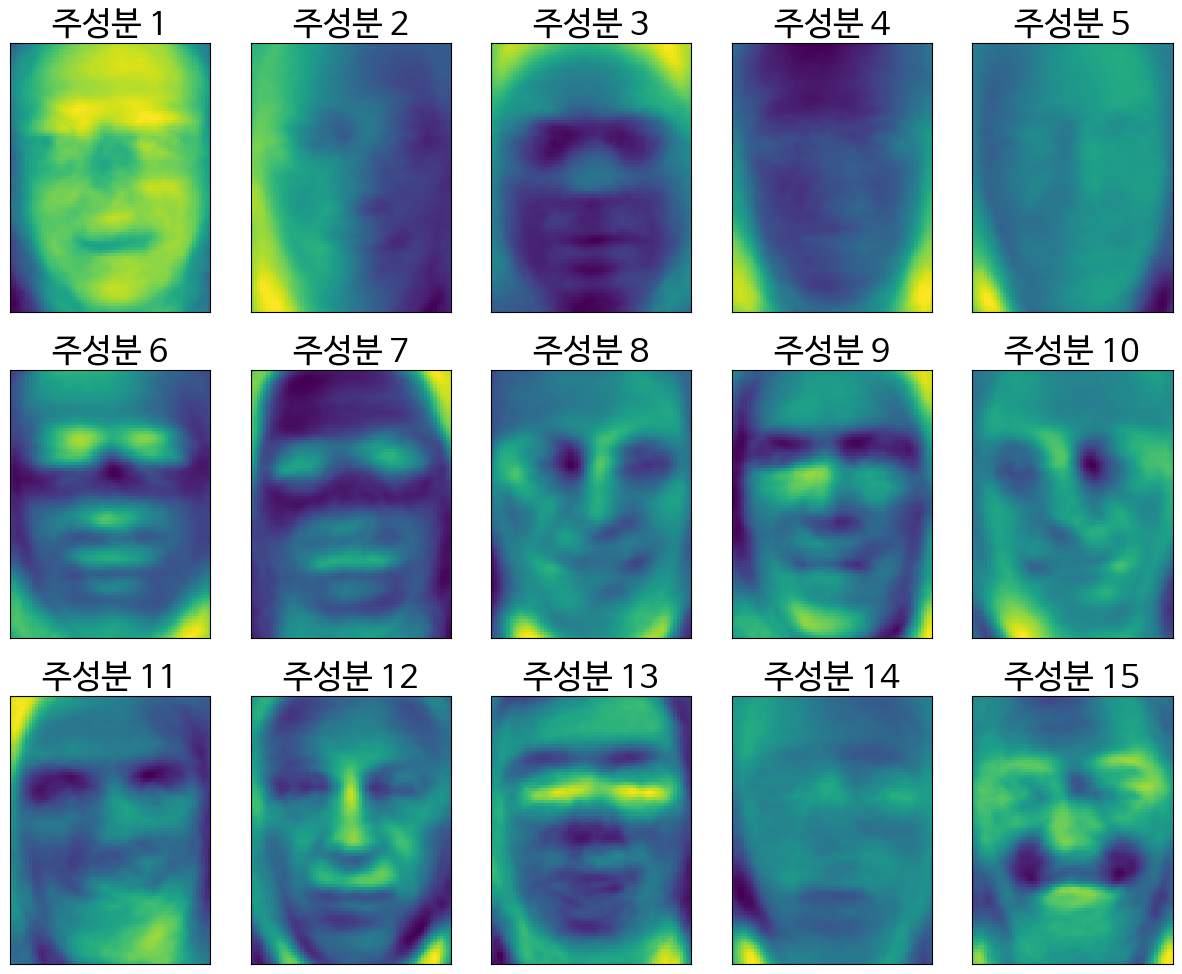

In [36]:
# 5655 -> 100개로 특징 추출한 이미지

fig, axes = plt.subplots(3, 5, figsize = (15, 12),
                         subplot_kw = {'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap = 'viridis')
  ax.set_title("주성분 {}".format((i+1)))

### 문제 2

In [39]:
# 두 벡터의 거리 값을 구하시오.
vec1 = np.array([20, 30, 90])
vec2 = np.array([80, 44, 40])

np.sqrt(sum((vec2 - vec1) ** 2))

79.3473376995095

In [37]:
### 강사님 정답
np.sqrt((20 - 80) ** 2 + (30 - 44) ** 2 + (90 - 40) ** 2)

79.3473376995095

### 문제 2-1

In [40]:
# 벡터 1의 크기를 구하시오.

np.sqrt(sum(vec1 ** 2))

96.95359714832658

### 문제 2-2

In [41]:
# 벡터 1의 방향 값을 구하시오.

vec1 / np.sqrt(sum(vec1 ** 2))

array([0.20628425, 0.30942637, 0.92827912])

In [43]:
# 방향 값은 늘 1이 되어야 한다. 방향 값이 1이 잘 나오는지 확인하시오.

np.sqrt(sum(vec1 / np.sqrt(sum((vec1) ** 2))**2))

0.12203940765702116

### 문제 2-3

In [44]:
# 두 벡터의 사이각을 구하시오.
np.arccos(np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2)))

0.8303072556381692

In [45]:
### 강사님 정답
# 내적
dotvalue = sum(vec1 * vec2)
dotvalue

6520

In [46]:
vec1 @ vec2

6520

In [53]:
# a 내적 기호 b = |a| |b| ...
dist1 = np.sqrt(sum((vec1) ** 2))
dist2 = np.sqrt(sum((vec2) ** 2))

costheta = dotvalue / (dist1 * dist2)  # 길이의 비로 나타남
#np.acos(costheta)

In [54]:
from sklearn import metrics
metrics.pairwise.pairwise_distances(vec1, vec2, metric='l1')  # 'L1' to 'l1'
metrics.pairwise.pairwise_distances(vec1, vec2, metric='l2')
metrics.pairwise.pairwise_distances(vec1, vec2, metric='manhattan')

ValueError: Expected 2D array, got 1D array instead:
array=[20. 30. 90.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# mahalanobis (마할라노비스 거리)

In [55]:
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import EmpiricalCovariance
import pandas as pd

data = np.array([
    [4, 2, 3],
    [1, 5, 6],
    [7, 8, 9],
    [2, 6, 4],
    [3, 7, 5]
])

df = pd.DataFrame(data, columns = ["Feature1", "Feature2", "Feature3"])
mean_vector = np.mean(data, axis = 0)

cov_matrix = np.cov(data, rowvar = False)  # 공분산 행렬
cov_matrix_inv = np.linalg.inv(cov_matrix)  # 역행렬

# 의료 진단 분야에서 거리 값으로 사용
# 평균 벡터와 공분산 행렬의 역행렬
# 길이의 비 -> 분산! 고려. 축 방향의 분산 고려하여 거리 값 측정.
# 데이터의 중심으로부터의 거리
# 분산이 큰 경우엔 변화가 심함. -> 작은 변동은 미세하게 판단
# 분산이 작은 경우엔 작은 변동도 비례해서 커짐.
mahalanobis_distances = [mahalanobis(sample, mean_vector, cov_matrix_inv) for sample in data]
df['Mahalanobis_Distance'] = mahalanobis_distances

print("\n Mahalanobis Distance:")
print(df)


 Mahalanobis Distance:
   Feature1  Feature2  Feature3  Mahalanobis_Distance
0         4         2         3              1.782187
1         1         5         6              1.782187
2         7         8         9              1.762033
3         2         6         4              1.127576
4         3         7         5              1.127576


# Clustering
 - KMeans(거리 기반) 하는 중
    - 라벨 결정할 때 (종속변수 결정할 때)

 - 대분류 할 때 사용
 - 벡터 양자화
 - 원형이상치

-------------------------------------------------

 - 동작 원리: k, 중심값 결정
    - 모든 데이터와의 중심값과 거리를 구함
    - 가까운 중심으로 군집 결정함.
    - 군집의 요소들의 평균을 구함. -> 중심값으로 결정함.
    - 이것을 반복!


가장 적합한 군집은 군집 내의 응집도를 높이고, 군집 간에는 이격한다.

* 문제점을 해소하기 위해서 BDSCAN(밀도기반), GMM(확률기반) 사용

In [56]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()  # 150 x 4
X = iris.data[:, :2] # 변수 2개 선택  # 150 x 2로 변환
y_iris = iris.target  # 150 x 1

km2 = cluster.KMeans(n_clusters = 2).fit(X)  # 2개의 군집으로 나눠라~
km3 = cluster.KMeans(n_clusters = 3).fit(X)
km4 = cluster.KMeans(n_clusters = 4).fit(X)  # 맨 마지막에 군집의 중심값이 만들어짐. 각 중심과 각 거리 값을 합친 거? WSS(Within Sum of Square, 작으면 좋음)

Text(0.5, 1.0, 'K=4, J=28.03')

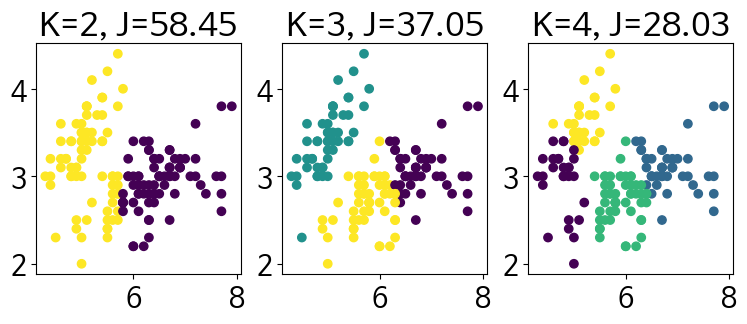

In [58]:
plt.figure(figsize = (9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c = km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c = km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)  # inertia_: WSS(Within Sum of Square)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c = km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)

# 군집이 많아지면, WSS는 줄어드는 경향을 보임.

In [59]:
km4.cluster_centers_  # 군집의 대표값 -> 군집의 특성

array([[4.77777778, 2.94444444],
       [6.85348837, 3.1       ],
       [5.90980392, 2.73529412],
       [5.22068966, 3.66551724]])

In [61]:
# 각 데이터에 대해 몇 군집에 들어가는 걸로 결정했는지  # 원래의 데이터 레이블은 3!

km3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
km3.inertia_  # WSS

# 오후 시작

In [ ]:
# Clustering 평가: 실루엣 계수
 데이터와 타 군집간의 거리 평균  - 군집 내 거리 평균
 ---------------------------------------------------
            max (둘 중에 큰 수)
            값의 범위 -1 (오분류) ~ 1 (정상분류)

In [75]:
# 결과: 군집 분류가 잘 되었다.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples = 300, centers = 3, cluster_std = 1.0,
                  random_state = 42)

kmeans = KMeans(n_clusters = 3, random_state = 42)
labels = kmeans.fit_predict(X)

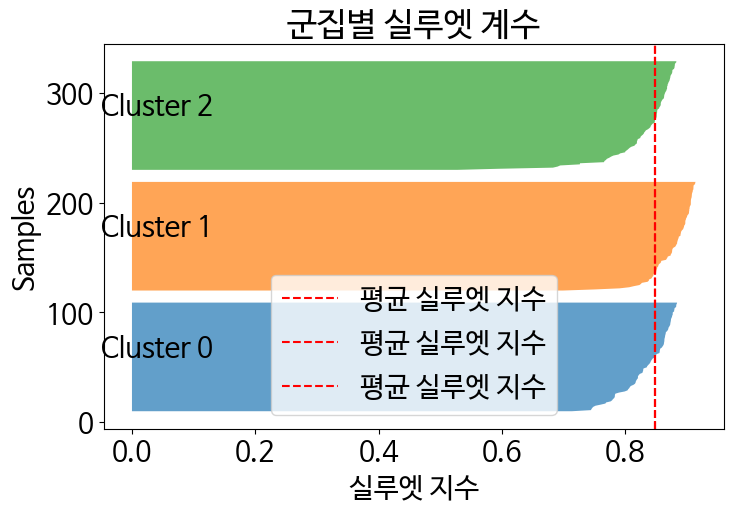

In [74]:
# 개별 데이터의 실루엣 계수
# 잘 분류되면 1
silhouette_vals = silhouette_samples(X, labels)
plt.figure(figsize = (8, 5))

y_lower = 10

for i in range(3):
  cluster_silhouette_vals = silhouette_vals[labels == i]
  cluster_silhouette_vals.sort()
  y_upper =  y_lower + len(cluster_silhouette_vals)
  plt.fill_betweenx(np.arange(y_lower, y_upper), 0,
                    cluster_silhouette_vals, alpha = 0.7)

  plt.text(-0.05, y_lower + len(cluster_silhouette_vals) / 2,
           f"Cluster {i}")

  y_lower = y_upper + 10

# vertical line  # 전체 실루엣 지수
plt.axvline(x = silhouette_score(X, labels), color = "red", linestyle = "--", label = "평균 실루엣 지수")
plt.xlabel("실루엣 지수")
plt.ylabel("Samples")
plt.title("군집별 실루엣 계수")
plt.legend()
plt.show()

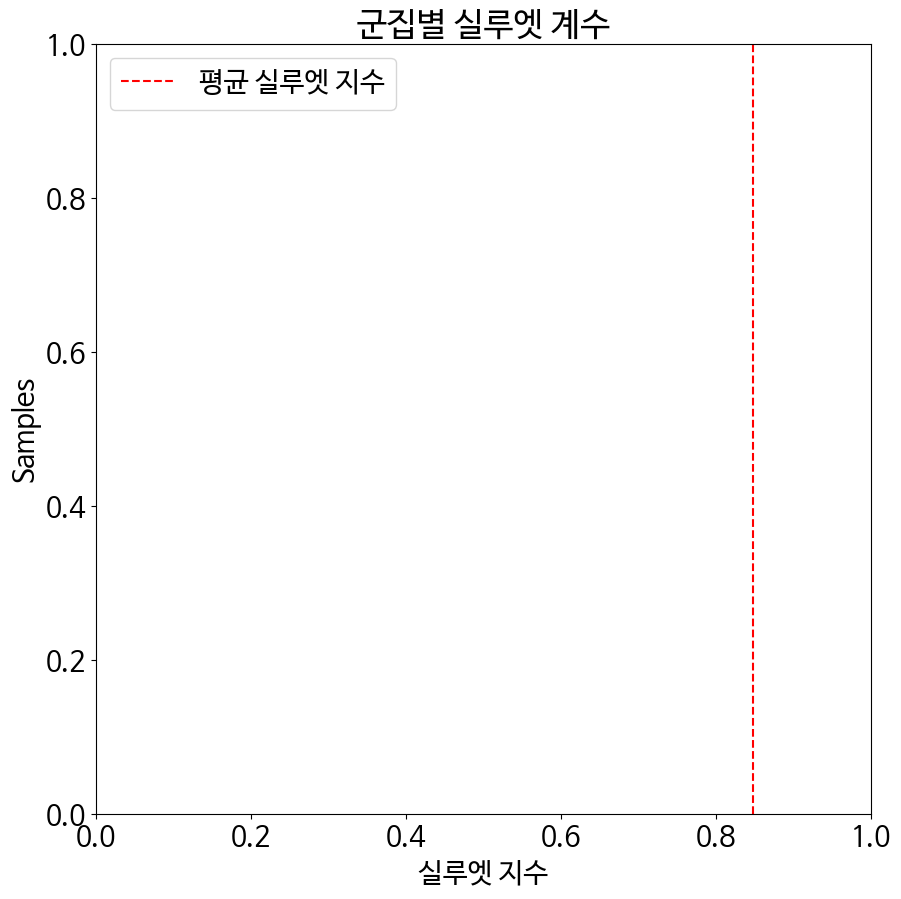

In [72]:
plt.axvline(x = silhouette_score(X, labels), color = "red", linestyle = "--", label = "평균 실루엣 지수")
plt.xlabel("실루엣 지수")
plt.ylabel("Samples")
plt.title("군집별 실루엣 계수")
plt.legend()
plt.show()

### 문제 3

In [76]:
# iris 데이터에 대하여 실루엣 계수를 구해서 시각화 해보시오.

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

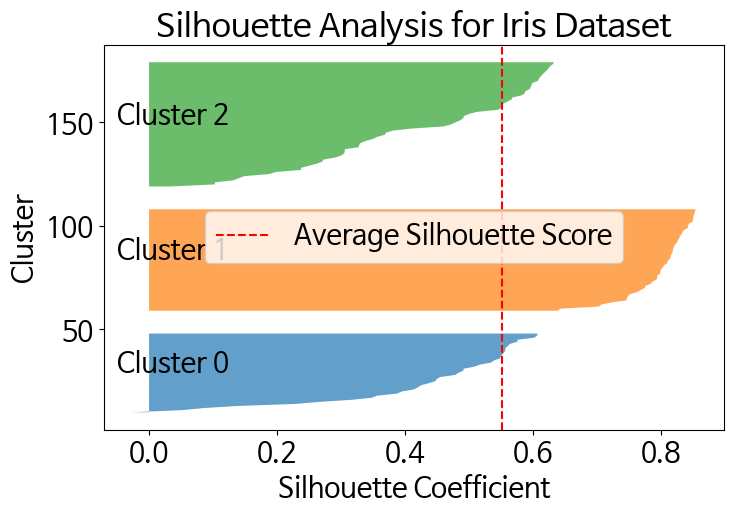

In [77]:
silhouette_vals = silhouette_samples(X, labels)
silhouette_avg = silhouette_score(X, labels)


plt.figure(figsize=(8, 5))
y_lower = 10

for i in range(3):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    plt.text(-0.05, y_lower + len(cluster_silhouette_vals) / 2, f"Cluster {i}")
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Average Silhouette Score")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Analysis for Iris Dataset")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


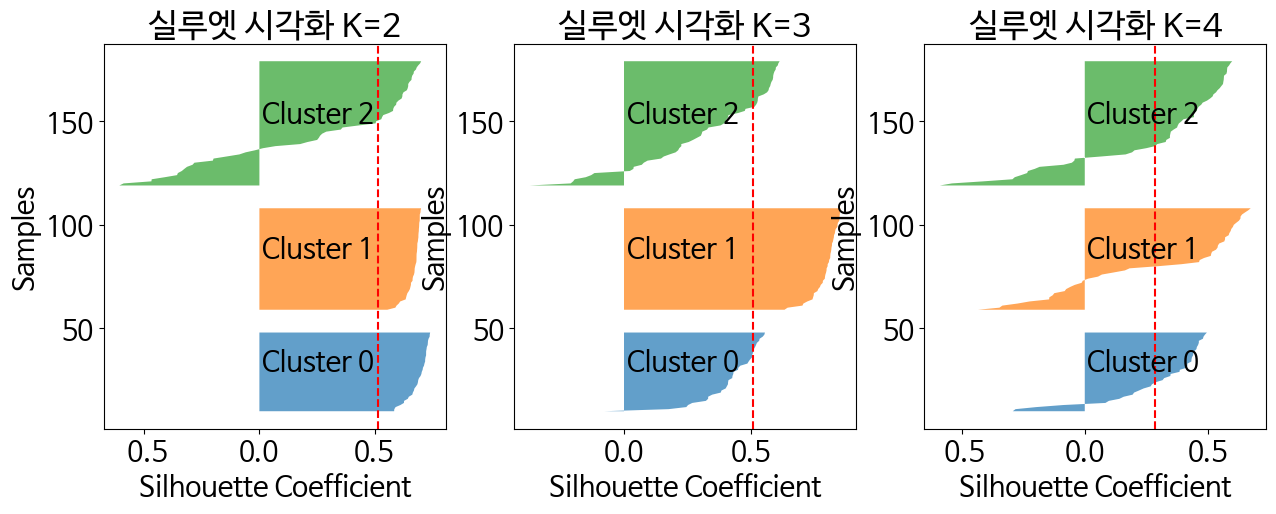

In [84]:
### 강사님 정답

silhouette_scores = {
    "K=2": silhouette_score(X, km2.labels_),
    "K=3": silhouette_score(X, km3.labels_),
    "K=4": silhouette_score(X, km4.labels_)
}

silhouette_vals_2 = silhouette_samples(X, km2.labels_)
silhouette_vals_3 = silhouette_samples(X, km3.labels_)
silhouette_vals_4 = silhouette_samples(X, km4.labels_)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                                    # 도화지                        # 샘플별 실루엣 계수
for ax, silhouette_vals, labels_for_title, title in zip(axes, [silhouette_vals_2, silhouette_vals_3, silhouette_vals_4],
 [km2.labels_, km3.labels_, km4.labels_],  # 클러스터 별 레이블
 ["K=2", "K=3", "K=4"]  # 선택 이름
):


  y_lower = 10
  for i in np.unique(labels):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)

    ax.text(0.01, y_lower + len(cluster_silhouette_vals) / 2, f"Cluster {i}")
    y_lower = y_upper + 10

  ax.axvline(x=silhouette_scores[title], color="red", linestyle="--", label="Average Silhouette Score")
  ax.set_xlabel("Silhouette Coefficient")
  ax.set_ylabel("Samples")
  ax.set_title(f"실루엣 시각화 {title}")

# 벡터 양자화

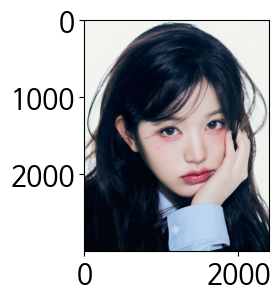

In [85]:
import matplotlib.pyplot as plt
from sklearn import cluster

image = plt.imread('/content/common.jpg')
plt.figure(figsize = (5, 3))
plt.imshow(image)

In [86]:
# 컬러 값이 다름
# 컬러 값이 있으면 이미지는 기본적으로 3차원  # 위에껀 흑백이었던 것!
image.shape  # (3000, 2400, 3)

(3000, 2400, 3)

In [87]:
# image 바이트 수를 계산하시오.

3000 * 2400 * 3
image.shape[0] * image.shape[1] * image.shape[2]

21600000

In [89]:
x, y, z = image.shape
image = np.array(image, dtype = np.float64) / 255
image_2d = image.reshape(x * y, z)
image_2d.shape  # 7200000의 컬러로 이미지 사이즈가 차있다.  # 3가지 컬러가

(7200000, 3)

# 컬러 스터링

In [100]:
kmeans_cluster = cluster.KMeans(n_clusters = 64)  # 16 -> 32 -> 64
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_  # 중심도 16개 -> 중심값 결정
cluster_centers

array([[2.72393856e-05, 1.01496052e-04, 3.28005485e-04],
       [3.35532521e-03, 2.89195930e-03, 2.83679956e-03],
       [1.74881453e-03, 1.67313665e-03, 1.77861938e-03],
       [3.72846598e-03, 3.74540873e-03, 3.67002487e-03],
       [1.04351650e-03, 9.88498805e-04, 1.09177198e-03],
       [2.87225299e-03, 3.25087126e-03, 3.67744347e-03],
       [1.98459049e-04, 4.66450309e-04, 7.25890428e-04],
       [2.62291861e-03, 2.35666596e-03, 2.32627987e-03],
       [5.67775257e-04, 6.71915161e-04, 8.31921628e-04],
       [2.72965179e-03, 2.75488718e-03, 2.81549264e-03],
       [2.24866828e-03, 2.73729683e-03, 3.28755138e-03],
       [2.45445051e-03, 1.70145105e-03, 1.61752512e-03],
       [1.54886902e-03, 1.32925592e-03, 1.35133525e-03],
       [3.11915079e-03, 3.24375016e-03, 3.31910269e-03],
       [3.09987661e-05, 1.58766062e-04, 3.96070833e-04],
       [2.39792297e-04, 4.28553428e-04, 6.02039539e-04],
       [2.58876019e-03, 3.03036543e-03, 3.49655912e-03],
       [3.38828770e-03, 3.13302

In [101]:
len(cluster_centers)

64

In [102]:
cluster_centers.shape

(64, 3)

In [103]:
cluster_labels = kmeans_cluster.labels_
len(cluster_labels)  # 7200000개의 컬러값이 16개로 표현된 것.

7200000

# 센터 값에 레이블 값을 주어 대체

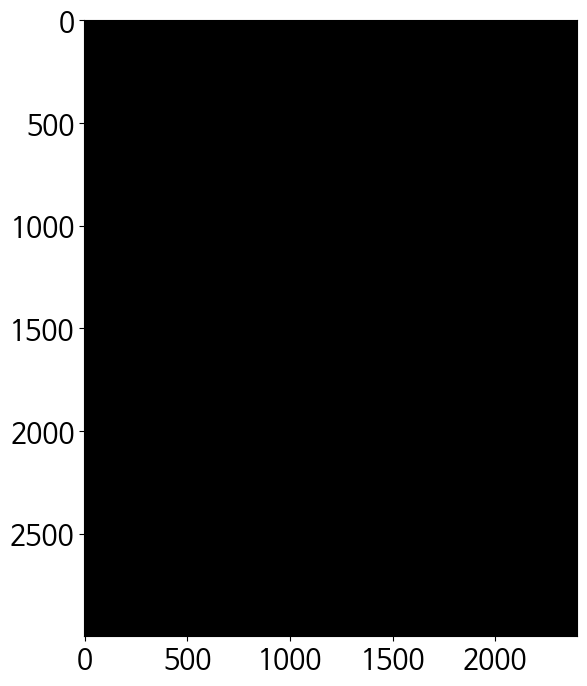

In [104]:
plt.figure(figsize = (15, 8))
plt.imshow(cluster_centers[cluster_labels].reshape(x, y, z))

### 큰 문제다

In [105]:

# 분산을 고려한 마할라노비스 거리를 이용해서 새롭게 입력되는 CRP, PCT를 Viral인지 Bacterial인지 결정하는 프로그램을 작성하시오.

data = {
    'Infection': ['Viral'] * 6 + ['Bacterial'] * 6,
    'CRP (mg/L)': [42, 57, 38, 43, 30, 58, 61, 70, 55, 74, 56, 72],
    'PCT (µg/L)': [33, 29, 39, 40, 45, 39, 67, 60, 62, 75, 55, 70]
}

In [ ]:
from scipy.spatial.distance import mahalanobis
from sklearn.covariance import EmpiricalCovariance
import pandas as pd

data = {
    'Infection': ['Viral'] * 6 + ['Bacterial'] * 6,
    'CRP (mg/L)': [42, 57, 38, 43, 30, 58, 61, 70, 55, 74, 56, 72],
    'PCT (µg/L)': [33, 29, 39, 40, 45, 39, 67, 60, 62, 75, 55, 70]
}

df = pd.DataFrame(data, columns = ["Infection", "CRP (mg/L)", "PCT (µg/L)"])
mean_vector = np.mean(data, axis = 0)

cov_matrix = np.cov(data, rowvar = False)  # 공분산 행렬
cov_matrix_inv = np.linalg.inv(cov_matrix)  # 역행렬


mahalanobis_distances = [mahalanobis(sample, mean_vector, cov_matrix_inv) for sample in data]
df['Mahalanobis_Distance'] = mahalanobis_distances

print("\n Mahalanobis Distance:")
print(df)

In [112]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis

# 데이터 생성
data = {
    'Infection': ['Viral'] * 6 + ['Bacterial'] * 6,  # Viral(바이러스성 감염) 과 Bacterial(세균성 감염)
    'CRP (mg/L)': [42, 57, 38, 43, 30, 58, 61, 70, 55, 74, 56, 72],
    'PCT (µg/L)': [33, 29, 39, 40, 45, 39, 67, 60, 62, 75, 55, 70]
}
df = pd.DataFrame(data)

# 각 그룹(Viral, Bacterial)의 평균 및 공분산 행렬 계산
viral_data = df[df['Infection'] == 'Viral'][['CRP (mg/L)', 'PCT (µg/L)']]  # CRP (C-reactive protein, C반응 단백질) / PCT (Procalcitonin, 프로칼시토닌)
bacterial_data = df[df['Infection'] == 'Bacterial'][['CRP (mg/L)', 'PCT (µg/L)']]

viral_mean = viral_data.mean().values
bacterial_mean = bacterial_data.mean().values

print(viral_mean)
print('\n', bacterial_mean)

[44.66666667 37.5       ]

 [64.66666667 64.83333333]


In [111]:
viral_cov_inv = np.linalg.inv(np.cov(viral_data.T))
bacterial_cov_inv = np.linalg.inv(np.cov(bacterial_data.T))

print(viral_cov_inv)
print('\n', bacterial_cov_inv)

[[0.01404428 0.01734623]
 [0.01734623 0.05277246]]

 [[ 0.02764378 -0.02226227]
 [-0.02226227  0.03695186]]


In [113]:
def classify(crp, pct):
    point = np.array([crp, pct])
    dist_viral = mahalanobis(point, viral_mean, viral_cov_inv)
    dist_bacterial = mahalanobis(point, bacterial_mean, bacterial_cov_inv)

    return 'Viral' if dist_viral < dist_bacterial else 'Bacterial'

<Axes: xlabel='CRP (mg/L)', ylabel='PCT (µg/L)'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 181 (\N{MICRO SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 181 (\N{MICRO SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


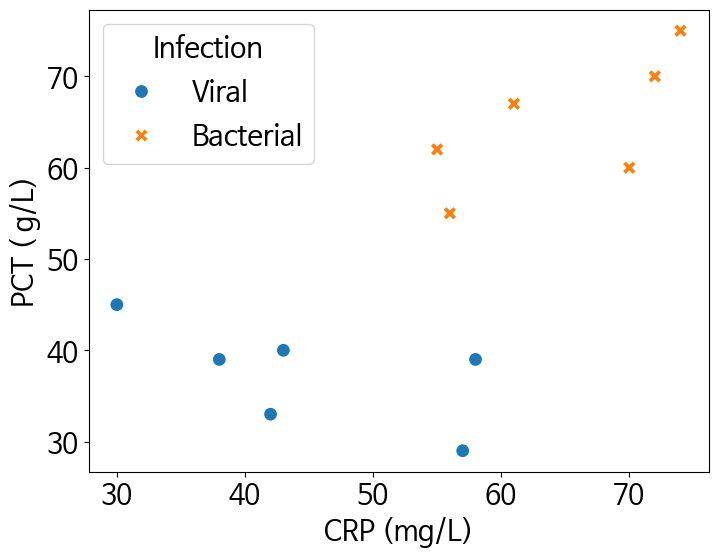

In [115]:
# 새로운 데이터 입력
test_data = [
    (50, 35),
    (65, 65),
    (40, 30),
    (60, 55)
]

# 시각화 해보기
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['CRP (mg/L)'], y=df['PCT (µg/L)'], hue=df['Infection'], style=df['Infection'], s=100)

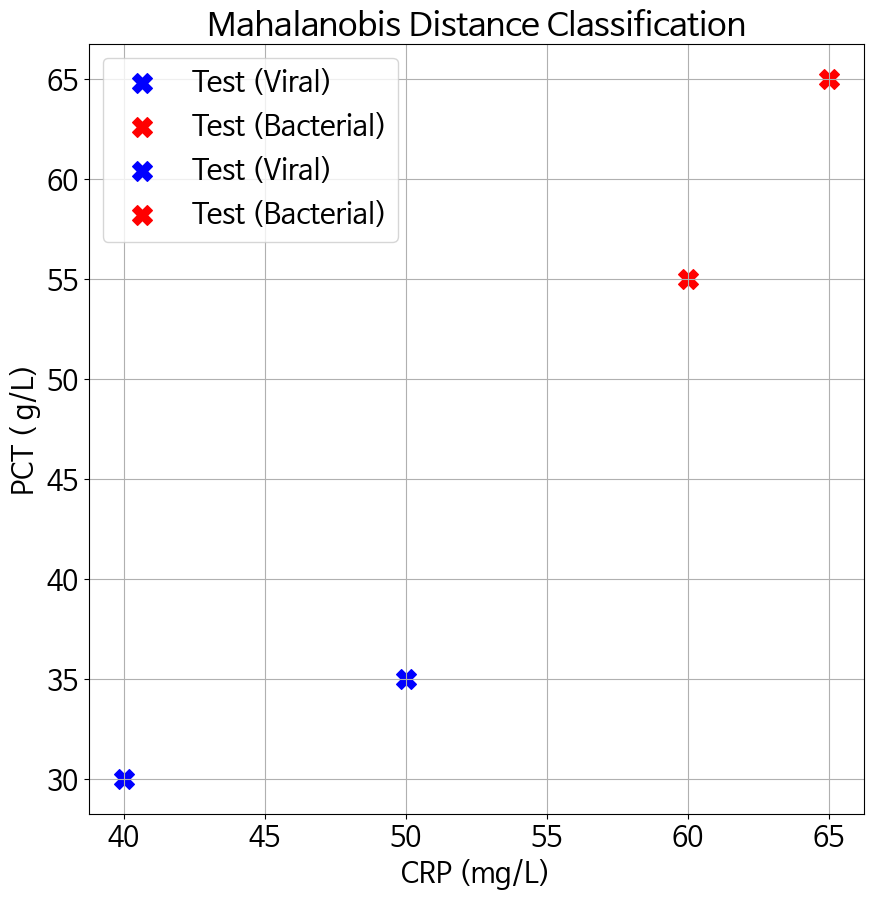

CRP: 50, PCT: 35 -> Infection Type: Viral
CRP: 65, PCT: 65 -> Infection Type: Bacterial
CRP: 40, PCT: 30 -> Infection Type: Viral
CRP: 60, PCT: 55 -> Infection Type: Bacterial


In [116]:
# 새로운 테스트 데이터 플롯
test_results = []
for crp, pct in test_data:
    result = classify(crp, pct)
    test_results.append((crp, pct, result))
    plt.scatter(crp, pct, color='red' if result == 'Bacterial' else 'blue', marker='X', s=200, label=f'Test ({result})')

plt.xlabel("CRP (mg/L)")
plt.ylabel("PCT (µg/L)")
plt.title("Mahalanobis Distance Classification")
plt.legend()
plt.grid()
plt.show()

# 테스트 결과 출력
for crp, pct, result in test_results:
    print(f"CRP: {crp}, PCT: {pct} -> Infection Type: {result}")